<a href="https://colab.research.google.com/github/katarapusrivasthav/Full-Stack/blob/master/minipro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3,ResNet101,VGG19, ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential,load_model
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from glob import glob

In [7]:
folders = glob('/content/drive/My Drive/dataset/corn_disease/*')

In [8]:
folders

['/content/drive/My Drive/dataset/corn_disease/Corn_(maize)___healthy',
 '/content/drive/My Drive/dataset/corn_disease/Corn_(maize)___Common_rust_',
 '/content/drive/My Drive/dataset/corn_disease/Corn_(maize)___Northern_Leaf_Blight']

In [11]:
imagesize = [224,224]
vgg = VGG16(input_shape=imagesize + [3],weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [12]:
for l in vgg.layers:
  l.trainable = False

In [13]:
x = Flatten()(vgg.output)

In [14]:
prediction = Dense(3,activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [15]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)

In [18]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/corn_disease/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'training')
validation_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/corn_disease/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset = 'validation')

Found 2672 images belonging to 3 classes.
Found 667 images belonging to 3 classes.


In [19]:
hist = model.fit(training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
84/84 [==============================] - 1526s 18s/step - loss: 0.1791 - accuracy: 0.9353 - val_loss: 0.0405 - val_accuracy: 0.9880
Epoch 2/10
84/84 [==============================] - 11s 129ms/step - loss: 0.0187 - accuracy: 0.9981 - val_loss: 0.0211 - val_accuracy: 0.9940
Epoch 3/10
84/84 [==============================] - 11s 127ms/step - loss: 0.0111 - accuracy: 0.9981 - val_loss: 0.0177 - val_accuracy: 0.9970
Epoch 4/10
84/84 [==============================] - 11s 125ms/step - loss: 0.0077 - accuracy: 0.9993 - val_loss: 0.0143 - val_accuracy: 0.9955
Epoch 5/10
84/84 [==============================] - 10s 125ms/step - loss: 0.0059 - accuracy: 0.9993 - val_loss: 0.0136 - val_accuracy: 0.9970
Epoch 6/10
84/84 [==============================] - 10s 124ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0121 - val_accuracy: 0.9955
Epoch 7/10
84/84 [==============================] - 10s 125ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0134 - val_accuracy: 0.9940

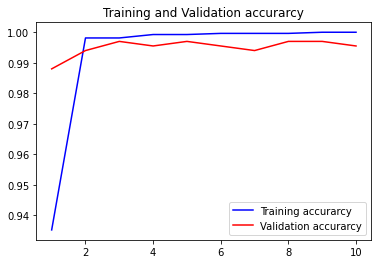

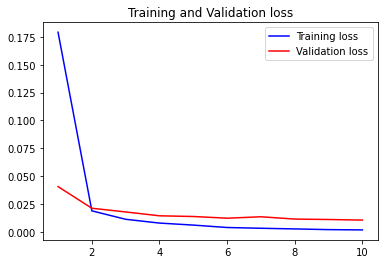

In [21]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()